In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [3]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [4]:
df.shape

(52, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sex     52 non-null     int64
 1   Rank    52 non-null     int64
 2   Year    52 non-null     int64
 3   Degree  52 non-null     int64
 4   YSdeg   52 non-null     int64
 5   Salary  52 non-null     int64
dtypes: int64(6)
memory usage: 2.6 KB


### Check for null values

In [6]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [7]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


### Outlier detection using IQR

In [8]:
for i in df.columns:
    iqr = df[i].quantile(0.75) - df[i].quantile(0.25)
    upper_threshold = df[i].quantile(0.75) + (1.5 * iqr)
    lower_threshold = df[i].quantile(0.25) - (1.5 * iqr)
    print("{} lower threshold :{} and upper threshold :{}".format(i,lower_threshold, upper_threshold))

Sex lower threshold :-1.5 and upper threshold :2.5
Rank lower threshold :-2.0 and upper threshold :6.0
Year lower threshold :-9.0 and upper threshold :23.0
Degree lower threshold :-1.5 and upper threshold :2.5
YSdeg lower threshold :-18.0 and upper threshold :48.0
Salary lower threshold :4729.125 and upper threshold :40776.125


All points are within the threshold value

In [9]:
df=df.drop_duplicates() #drop duplicates

In [10]:
df.shape

(52, 6)

# EDA

In [11]:
df.groupby("Sex")["Salary"].mean()  #0 mean male,1 mean female

Sex
0    24696.789474
1    21357.142857
Name: Salary, dtype: float64

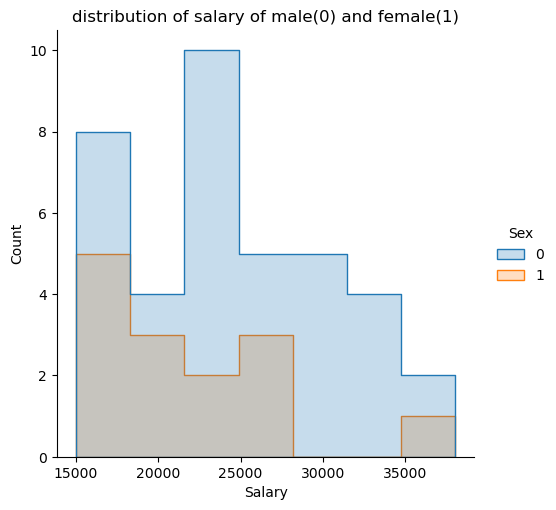

In [12]:
import seaborn as sns                                                         #using seaborn
sns.displot(df,x="Salary",hue="Sex",element="step",kind="hist");
plt.title("distribution of salary of male(0) and female(1)");

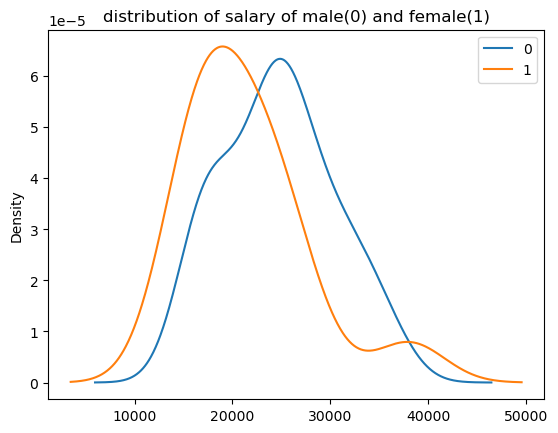

In [15]:
df.groupby("Sex")["Salary"].plot(kind="kde",legend=True,title="distribution of salary of male(0) and female(1)");
plt.show()

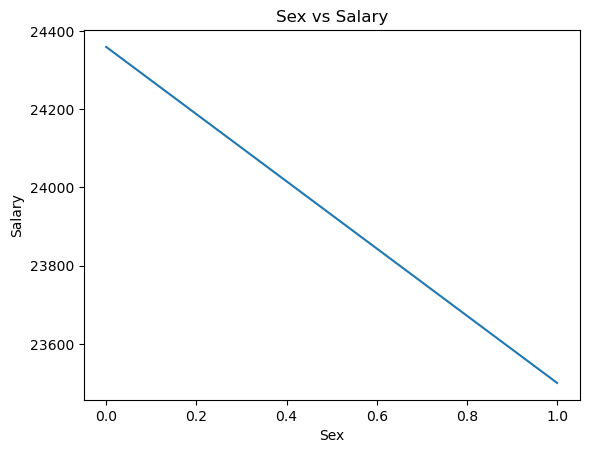

In [16]:
import matplotlib.pyplot as plt
import numpy as np
#df['transformed'] = np.exp(df['Degree'])
df.groupby('Degree')['Salary'].mean().plot()
#df.plot(x='transformed', y='Salary', style='o')
plt.title('Sex vs Salary')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.show()

In [17]:
df.groupby('Degree')['Salary'].mean()

Degree
0    24359.222222
1    23500.352941
Name: Salary, dtype: float64

In [18]:
df[['Sex','Salary']].corr()

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


There is weak negative correlation between 'Sex' and 'Salary'

Sex and Salary have weak nagative correlation

This means Male earn Salary slightly more than Female.

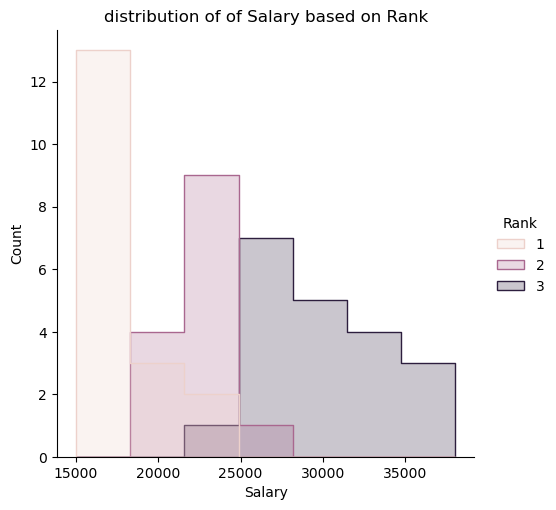

In [21]:
import seaborn as sns                                                         #using seaborn
sns.displot(df,x="Salary",hue="Rank",element="step",kind="hist")
plt.title("distribution of of Salary based on Rank");
plt.show()

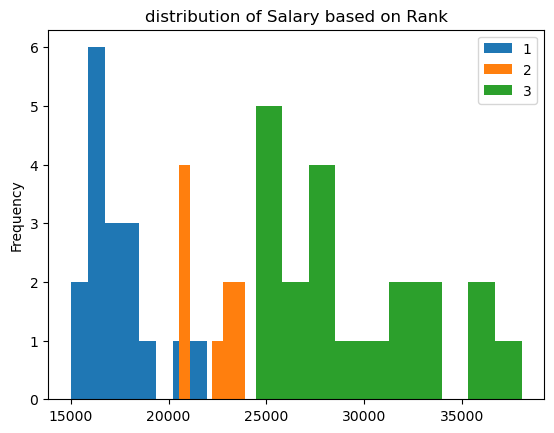

In [22]:
df.groupby("Rank")["Salary"].plot(kind="hist",legend=True,title="distribution of Salary based on Rank");
plt.show()

In [23]:
df[['Rank','Salary']].corr()  

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


There is very strong positive relation between Rank and Salary.

Higher the Rank--->higher the salary

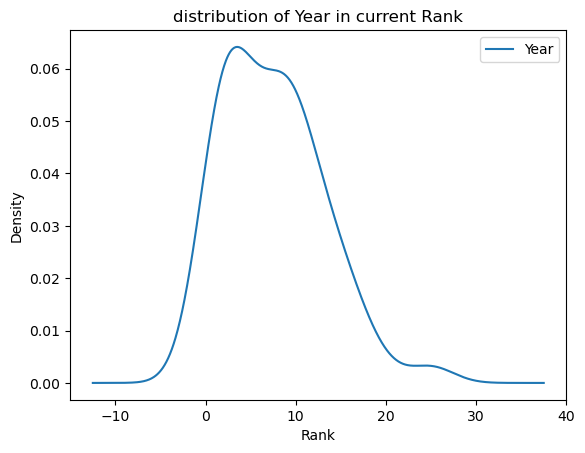

In [26]:
df["Year"].plot(kind="kde",legend=True,title="distribution of Year in current Rank");
plt.xlabel("Rank");
plt.show()

Sex and Salary have weak nagative correlation

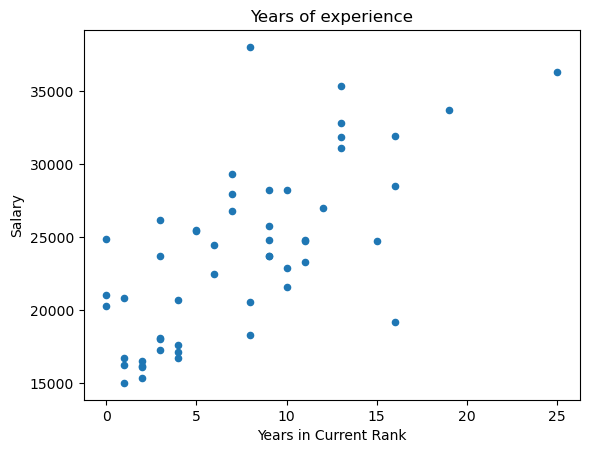

In [41]:
df.plot(x='Year', y='Salary',kind="scatter",style='o',xlabel="Years in Current Rank",ylabel="Salary",title="Years of experience")
plt.show()

In [30]:
df[['Year','Salary']].corr()

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


There is strong positive relation between Years and salary.It means higher the experience in current Rank more the salary

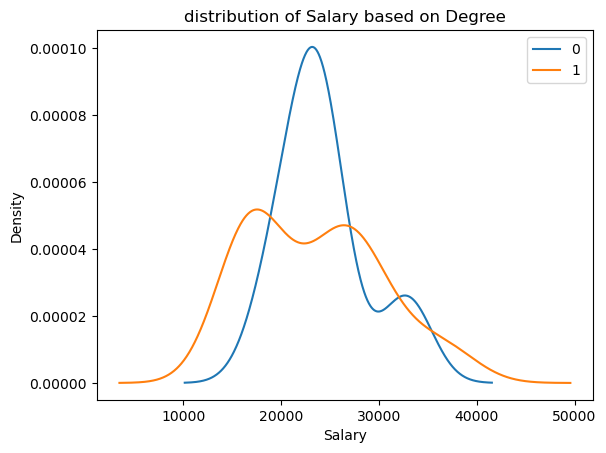

In [33]:
df.groupby("Degree")["Salary"].plot(kind="kde",legend=True,title="distribution of Salary based on Degree");
plt.xlabel("Salary");  #0 means Master,1 means doctorate
plt.show()

In [34]:
df[['Degree','Salary']].corr()

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


There is no correlation between Degree and salary. It means having either degree doctarate or masters won't affect getting salary

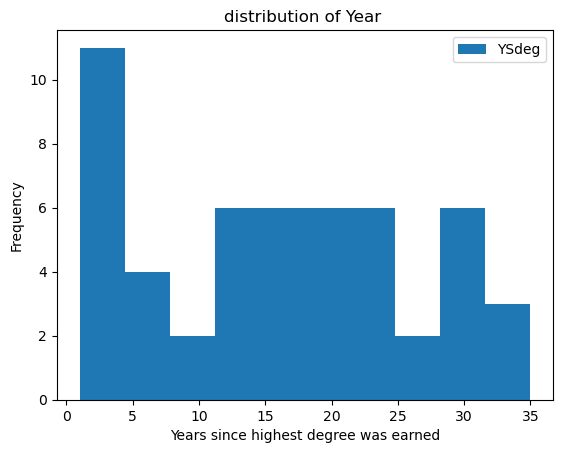

In [37]:
df["YSdeg"].plot(kind="hist",legend=True,title="distribution of Year ");
plt.xlabel("Years since highest degree was earned");
plt.show()

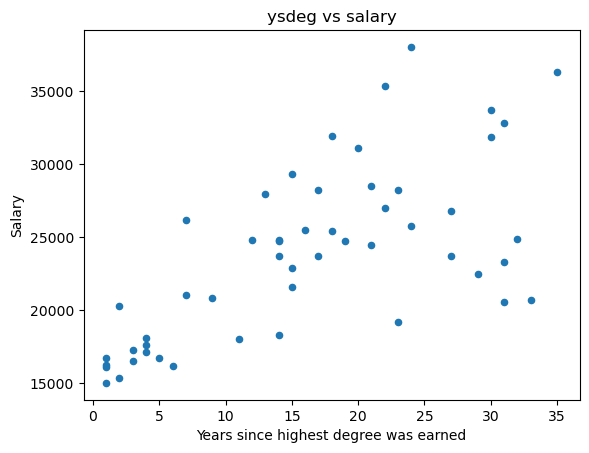

In [38]:
df.plot(x='YSdeg', y='Salary',kind="scatter",style='o',xlabel="Years since highest degree was earned",ylabel="Salary",title="ysdeg vs salary");
plt.show()

In [42]:
df[['YSdeg','Salary']].corr()

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


There is strong correlation between YSdeg and salary

### Train and Test split

In [43]:
X = df[['Sex', 'Rank', 'Year','Degree','YSdeg']].values #array of features
y = df['Salary'].values #array of targets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Scaling

In [44]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

In [45]:
X_train_scaled.shape,X_test_scaled.shape

((36, 5), (16, 5))

### Modelling

In [46]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [47]:
y_pred = regressor.predict(X_test_scaled)

In [48]:
nw=pd.DataFrame({"Real":y_test,"Predicted":y_pred})
nw

,Real,Predicted
0,22906,26390.538682
1,16686,16823.126515
2,35350,29477.703794
3,25400,25944.815350
4,20525,23278.694030
5,24800,24699.881180
6,24832,23947.754513
7,16094,17027.424343
8,38045,26982.579970
9,20999,20038.802735


In [50]:
coef=pd.DataFrame(regressor.coef_,["Sex","Rank","Year","Degree","YSdeg"],["Coefficients"])
coef

,Coefficients
Sex,131.142638
Rank,4148.207796
Year,2996.784653
Degree,-1135.339857
YSdeg,-1418.140274


In [ ]:
by above coefficient we can say that Sex is not determine Salary

In [53]:
regressor.coef_

array([  131.14263806,  4148.20779555,  2996.78465253, -1135.3398571 ,
       -1418.14027359])

In [54]:
print("Intercept is",regressor.intercept_)

Intercept is 23954.5


Linear Regression equation(y=mx+c) for this model

Predicted Body=(131.14*Sex) +(4148.20*Rank)+(2996.78*Year)-(1135.33*Degree)-(1418.14*YSdeg)+23954.5

### Matrics

In [55]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.663760620164551


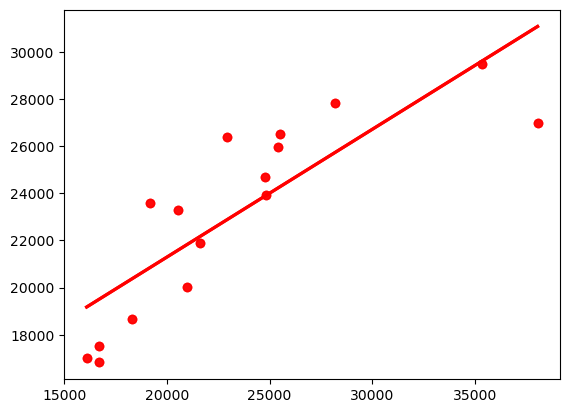

In [61]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');
plt.show()